In [2]:
import pandas as pd
datos = pd.read_csv("housing.csv")

In [3]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

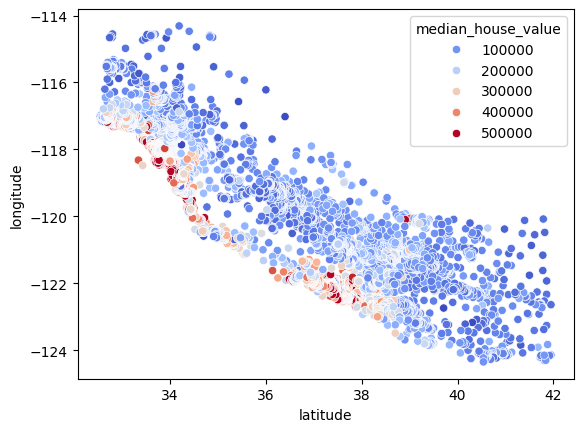

In [6]:
# La clusterización depende de que características queremos ponerles atención para después
# categorizarlo de cierta manera, por ejemplo, grupos en base a población o edad de las
# casas, o tomar las coordenadas y hacer una agrupación en base a ingresos medios, por ejemplo.

import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value", palette="coolwarm")


<Axes: xlabel='latitude', ylabel='longitude'>

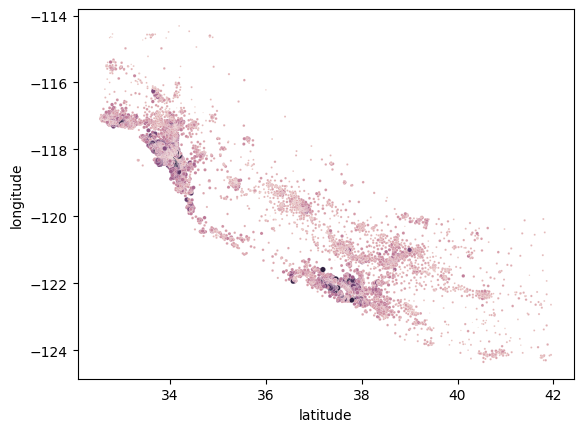

In [14]:
# Esto nos muestra el mapa basado en los precios de las casas, podemos cambiarlo para que sea
# basado en los ingresos medios de las personas.
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_income", s=datos["median_income"], legend=False)

In [ ]:
# Podemos ver por ejemplo que los que ganan menos están bastante distribuido, sin embargo vemos unos
# de color oscuro que ganan más y así. Sin embargo si quisieramos lanzar una campaña de mercado en
# el estado de california en base al status económico o ganancias que tienen esto no nos serviría tanto.
# Lo ideal es tener 4 o 5 categorías para aplicar ahí las campañas a cada una de esas categorías.

In [15]:
# Vamos a ocupar 3 datos: lat, long y median_income.
# Para eso pandas nos da:
datos.loc[:,["latitude", "longitude", "median_income"]]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [ ]:
# En este caso no existe "y", no hay etiquetas, solo datos.
X = datos.loc[:,["latitude", "longitude", "median_income"]]

from sklearn.cluster import KMeans
modelo = KMeans(n_clusters=3)
predicciones = modelo.fit_predict(X)

In [20]:
# Tenemos una lista completa de que cluster (nivel socioeconómico) asignó a cada registro
predicciones.shape

(20640,)

In [21]:
# Se lo agregamos a nuestros datos originales
X["segmento_economico"] = predicciones

In [22]:
X

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,1
1,37.86,-122.22,8.3014,1
2,37.85,-122.24,7.2574,1
3,37.85,-122.25,5.6431,1
4,37.85,-122.25,3.8462,1
...,...,...,...,...
20635,39.48,-121.09,1.5603,1
20636,39.49,-121.21,2.5568,1
20637,39.43,-121.22,1.7000,1
20638,39.43,-121.32,1.8672,1


In [23]:
X["segmento_economico"].value_counts()

segmento_economico
0    9387
1    8457
2    2796
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

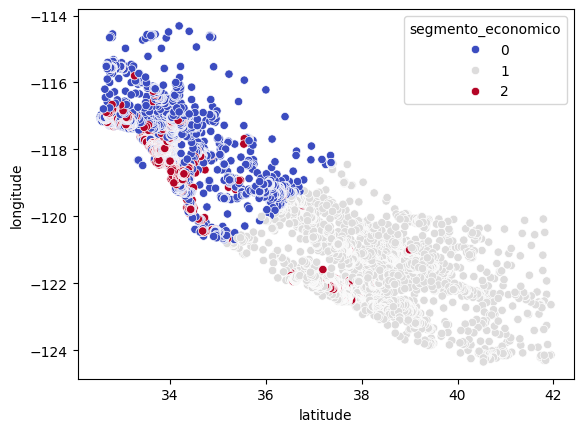

In [24]:
sb.scatterplot(x="latitude", y="longitude", data=X, hue="segmento_economico", palette="coolwarm")

In [25]:
# Se ve bien pero solamente tener 2 o 3 no sirve de tanto, entonces vamos a cambiarlo a 5 o 6.
X = datos.loc[:,["latitude", "longitude", "median_income"]]
modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(X)
X["segmento_economico"] = predicciones
# esto es un comentario

In [27]:
X["segmento_economico"].value_counts()

segmento_economico
0    7011
1    4849
2    3840
4    2798
3    1683
5     459
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

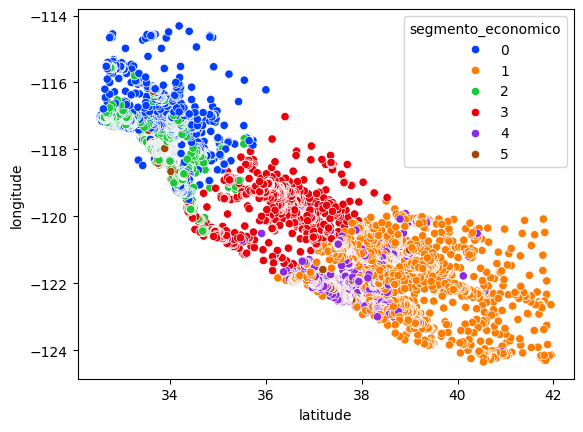

In [29]:
sb.scatterplot(x="latitude", y="longitude", data=X, hue="segmento_economico", palette="bright")

<Axes: xlabel='segmento_economico', ylabel='count'>

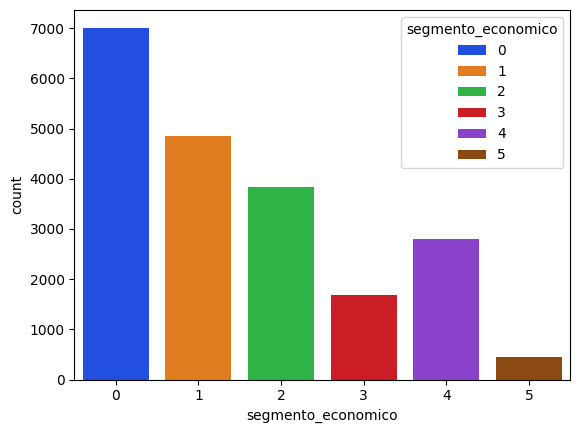

In [32]:
# Se ve mucho mejor pero queda la duda, quienes son los que realmente ganan más.
# Entonces vamos a hacer:
sb.countplot(x="segmento_economico", data=X, hue="segmento_economico",palette="bright")

In [33]:
# Probablemente los que más ganas sean los del 5 porque son los menos
# Pero para confirmarlo:
X.groupby(["segmento_economico"])["median_income"].mean()

segmento_economico
0     2.873155
1     2.814560
2     5.516542
3     2.669611
4     5.503269
5    10.946702
Name: median_income, dtype: float64

In [34]:
# Efectivamente 5 son los que más ganan. En orden serían:
# 5    10.946702
# 2     5.516542
# 4     5.503269
# 0     2.873155
# 1     2.814560
# 3     2.669611

# Hagamos una segmentación por población:

In [35]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

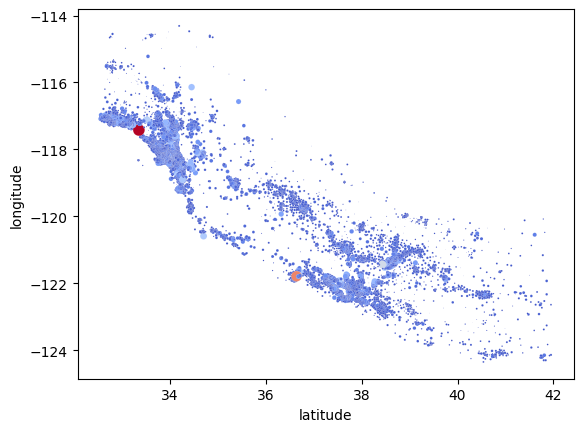

In [56]:
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="population", s=datos["population"]/500, legend=False, palette="coolwarm")

In [62]:
X = datos.loc[:,["latitude", "longitude", "population"]]
modelo = KMeans(n_clusters=5)
predicciones = modelo.fit_predict(X)
X["poblacion"] = predicciones

In [63]:
X["poblacion"].value_counts()

poblacion
0    10971
2     7320
4     2027
1      308
3       14
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

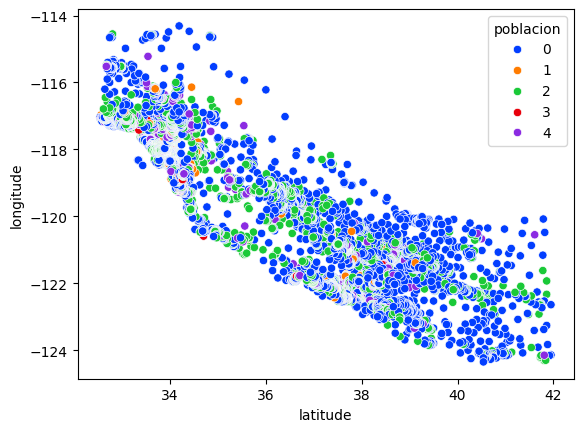

In [64]:
sb.scatterplot(x="latitude", y="longitude", data=X, hue="poblacion", palette="bright")

In [65]:
X.groupby(["poblacion"])["population"].mean()

poblacion
0      774.523380
1     6609.012987
2     1665.556967
3    16142.142857
4     3192.452393
Name: population, dtype: float64

<Axes: xlabel='poblacion', ylabel='count'>

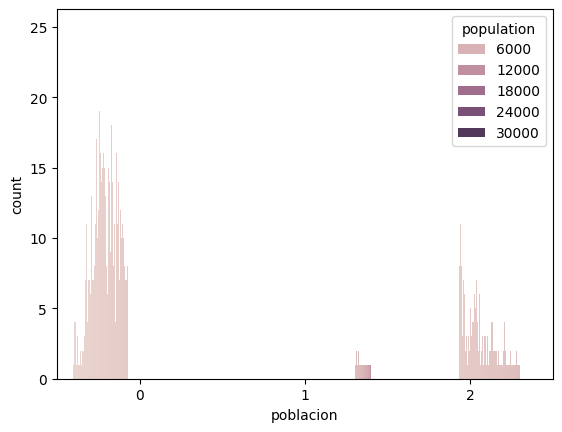

In [60]:
sb.countplot(x="poblacion", data=X, hue="population")